# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [60]:
import seaborn as sns
%matplotlib inline


## Data
Seaborn comes with built-in data sets!

In [61]:
tips = sns.load_dataset('tips')

In [62]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

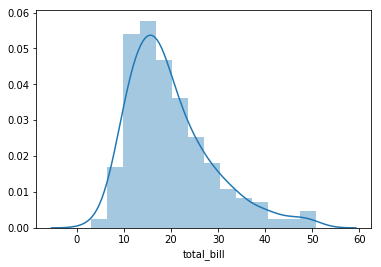

In [63]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

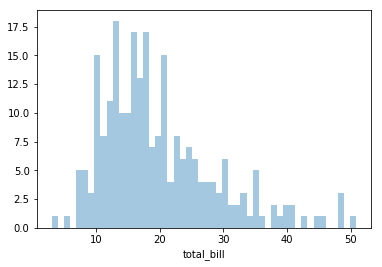

In [64]:
sns.distplot(tips['total_bill'],kde=False,bins=50)
#What is the Y-axis

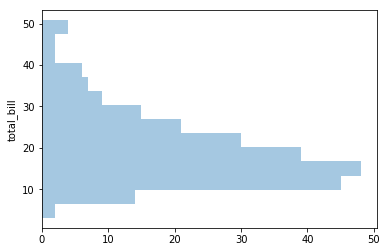

In [65]:
sns.distplot(tips['total_bill'],vertical=True,kde=False)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

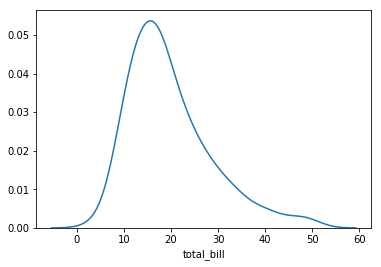

In [66]:
sns.distplot(tips['total_bill'],hist=False)

In [67]:
#sns.jointplot(x='day',y='total_bill',data=tips,kind='scatter')
#Throws error ->

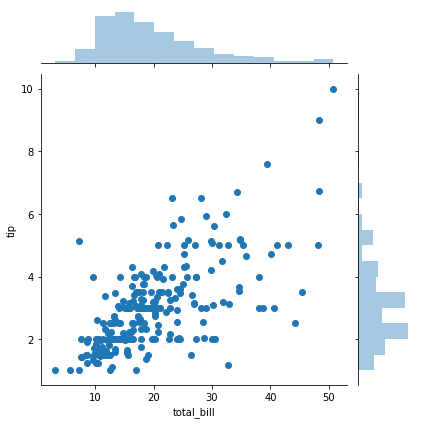

In [68]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

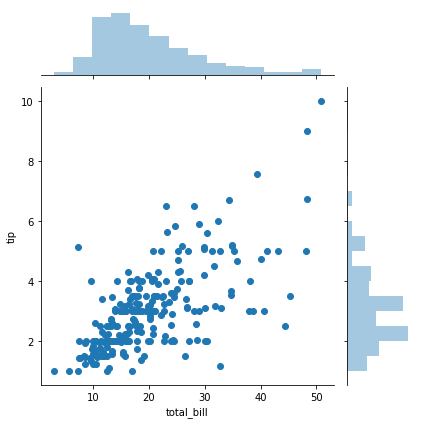

In [69]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter',ratio = 4)

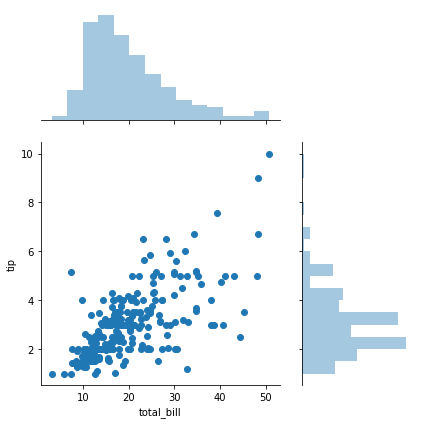

In [44]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter',ratio = 2)

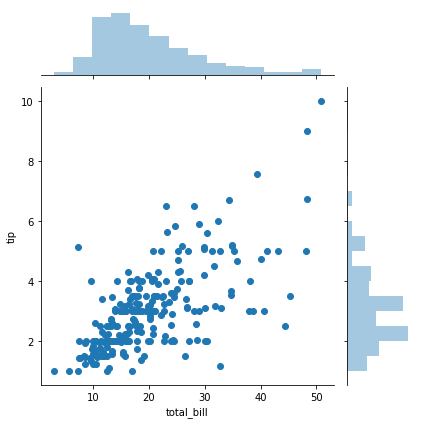

In [45]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter',ratio = 4)

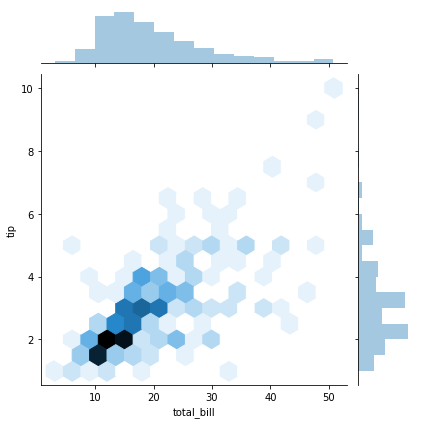

In [46]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

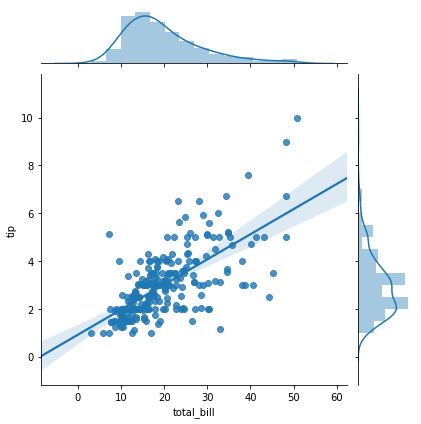

In [47]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

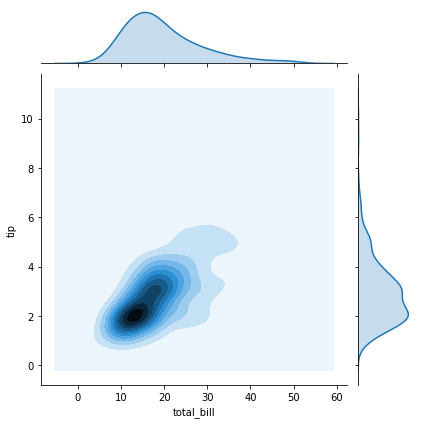

In [48]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

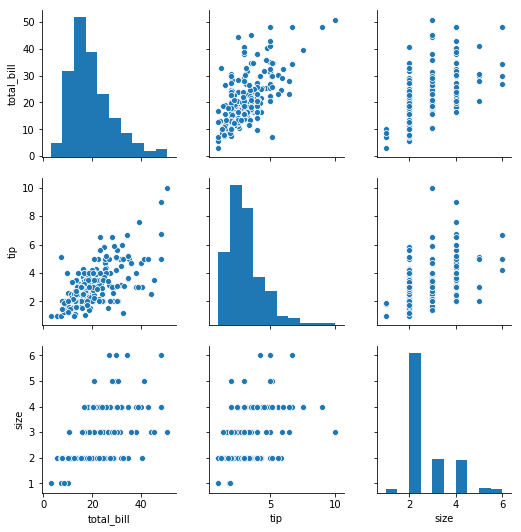

In [49]:
sns.pairplot(tips)

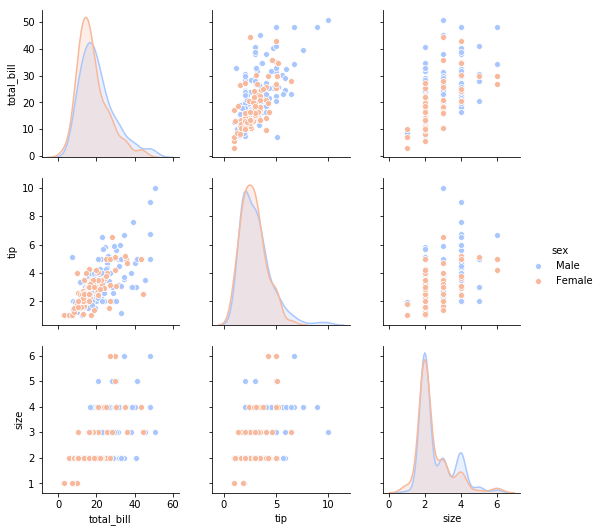

In [50]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

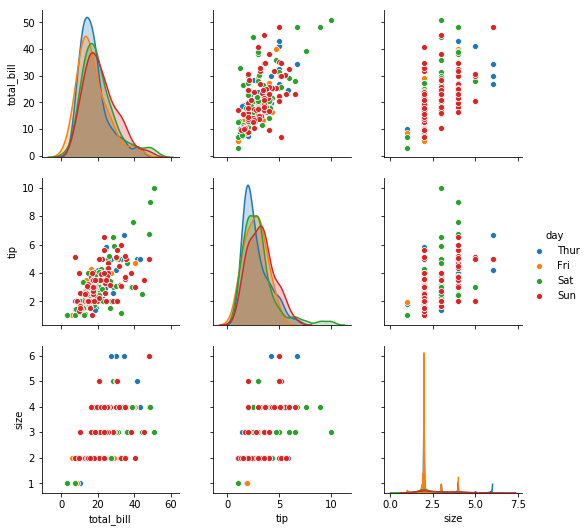

In [51]:
sns.pairplot(tips,hue='day')

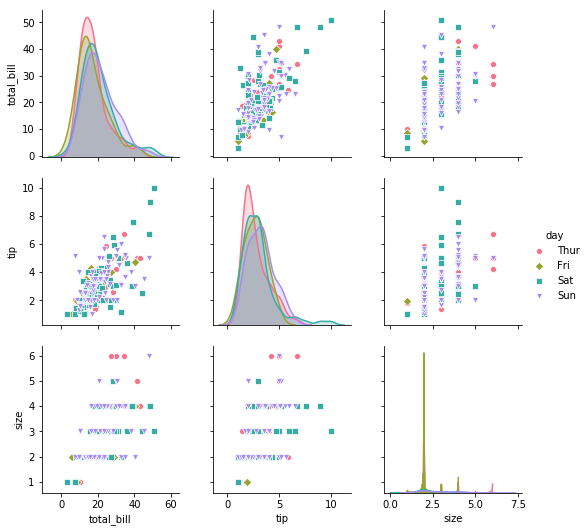

In [52]:
sns.pairplot(tips,hue='day',palette = 'husl',markers = ['o','D','s','v'])

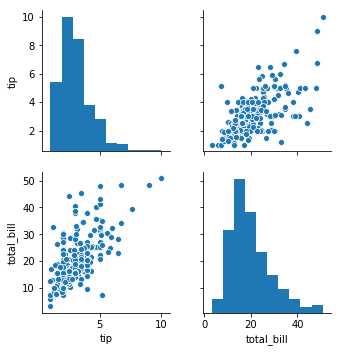

In [53]:
sns.pairplot(tips,vars = ['tip','total_bill'])

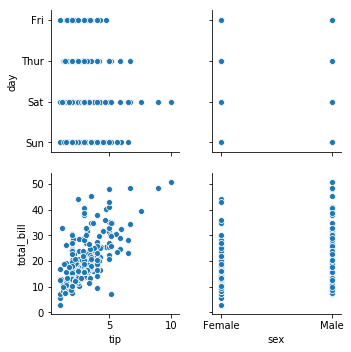

In [54]:
sns.pairplot(tips,x_vars = ['tip','sex'],y_vars=['day','total_bill'])

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

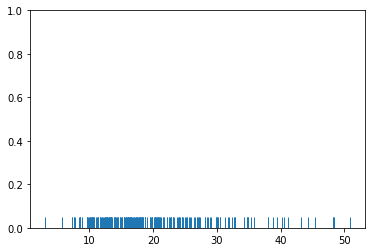

In [55]:
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

[ 0.94674798 -0.79977529 -1.35136001  0.15348716  0.95005481 -0.56756528
 -0.14253981  0.3238087  -1.1460133   3.31549402 -0.72456459 -0.75047782
 -0.02915306 -0.28018744 -1.15137665 -2.01332317  0.60522958  0.26277662
  1.01326959  1.24102107  0.14205549 -0.20540178  0.78925449  0.31722232
  0.01501308]
<class 'numpy.ndarray'>


(0, 1)

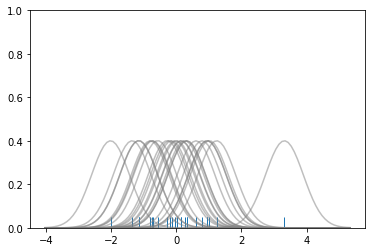

In [56]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)
print(dataset)
print(type(dataset))
# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

#stats.norm

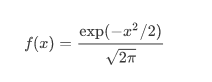

Text(0.5, 0.98, 'Sum of the Basis Functions')

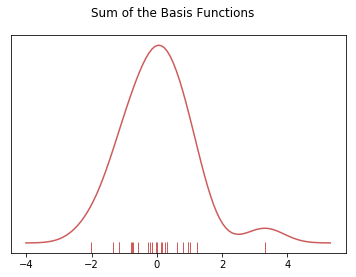

In [57]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

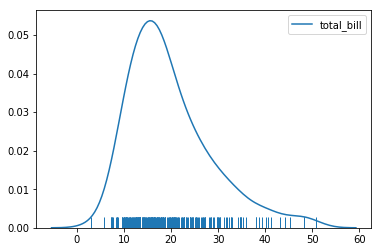

In [58]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

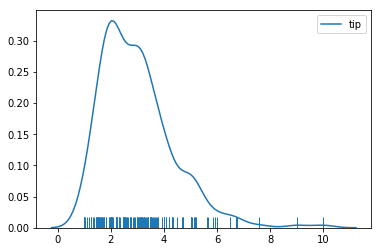

In [59]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])